In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
import os
os.chdir(r"C:\Users\NEW USER\anaconda_projects")
print("Current working directory:", os.getcwd())
print(os.listdir(r"C:\Users\NEW USER\anaconda_projects"))

Current working directory: C:\Users\NEW USER\anaconda_projects
['49950659-38ff-46f1-ac3d-78c7b78e6776', 'amir_deals.csv', 'countries-of-the-world.csv', 'db', 'employee_data.xlsx', 'food_consumption.csv', 'mpg.csv', 'netflix_data.csv', 'schools.csv', 'student_alcohol_consumption.csv', 'world_happiness.csv', 'young-people-survey-responses.csv']


In [3]:
print(os.listdir(r"C:\Users\NEW USER\anaconda_projects"))

['49950659-38ff-46f1-ac3d-78c7b78e6776', 'amir_deals.csv', 'countries-of-the-world.csv', 'db', 'employee_data.xlsx', 'food_consumption.csv', 'mpg.csv', 'netflix_data.csv', 'schools.csv', 'student_alcohol_consumption.csv', 'world_happiness.csv', 'young-people-survey-responses.csv']


In [4]:
employee = pd.read_excel("employee_data.xlsx") 
print(employee.head(5))

   EmpID FirstName LastName  StartDate ExitDate                    Title  \
0   3427     Uriah  Bridges 2019-09-20      NaT  Production Technician I   
1   3428     Paula    Small 2023-02-11      NaT  Production Technician I   
2   3429    Edward     Buck 2018-12-10      NaT       Area Sales Manager   
3   3430   Michael  Riordan 2021-06-21      NaT       Area Sales Manager   
4   3431   Jasmine    Onque 2019-06-29      NaT       Area Sales Manager   

        Supervisor                        ADEmail BusinessUnit EmployeeStatus  \
0     Peter Oneill    uriah.bridges@bilearner.com         CCDR         Active   
1  Renee Mccormick      paula.small@bilearner.com           EW         Active   
2   Crystal Walker      edward.buck@bilearner.com           PL         Active   
3   Rebekah Wright  michael.riordan@bilearner.com         CCDR         Active   
4        Jason Kim    jasmine.onque@bilearner.com          TNS         Active   

   ...              Division                  DOB State 

EmpID                         0
FirstName                     0
LastName                      0
StartDate                     0
ExitDate                      0
Title                         0
Supervisor                    0
ADEmail                       0
BusinessUnit                  0
EmployeeStatus                0
EmployeeType                  0
PayZone                       0
EmployeeClassificationType    0
TerminationType               0
TerminationDescription        0
DepartmentType                0
Division                      0
DOB                           0
State                         0
JobFunctionDescription        0
GenderCode                    0
LocationCode                  0
RaceDesc                      0
MaritalDesc                   0
Performance Score             0
Current Employee Rating       0
dtype: int64
    EmpID    FirstName  LastName  StartDate   ExitDate               Title  \
6    3433        Latia     Costa 2022-04-06 2023-07-03  Area Sales Manager   

C:\Users\NEW USER\AppData\Local\Temp\ipykernel_5004\1491224372.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employeeisanum["DOB"] = pd.to_datetime(employeeisanum["DOB"], errors='coerce')
C:\Users\NEW USER\AppData\Local\Temp\ipykernel_5004\1491224372.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employeeisanum["StartDate"] = pd.to_datetime(employeeisanum["StartDate"], errors='coerce')
C:\Users\NEW USER\AppData\Local\Temp\ipykernel_5004\1491224372.py:14: SettingWithCopyWarning: 
A value is tryi

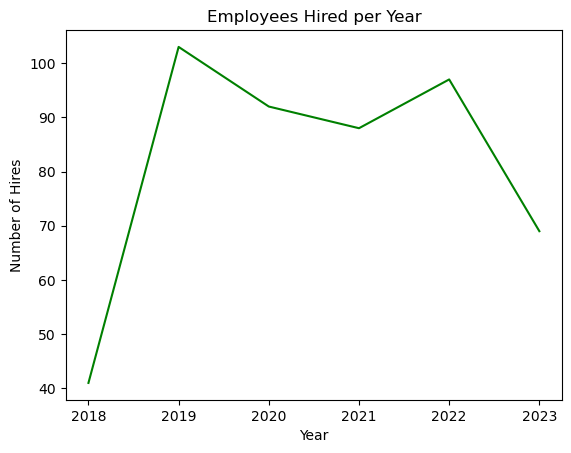

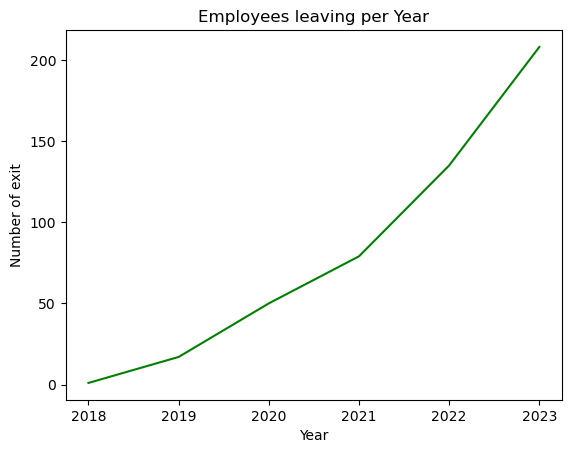

In [5]:
#checking for null data
employee.isna().sum()
#dropping null data
employeeisanum = employee.dropna()  
print(employeeisanum.isna().sum())
print(employeeisanum.head(9))
#What's the age distribution of current employees?
#Purpose: Workforce planning & diversity analysis.

#stringdate to datetime objects
# Convert each column separately with error handling
employeeisanum["DOB"] = pd.to_datetime(employeeisanum["DOB"], errors='coerce')
employeeisanum["StartDate"] = pd.to_datetime(employeeisanum["StartDate"], errors='coerce')
employeeisanum["ExitDate"] = pd.to_datetime(employeeisanum["ExitDate"], errors='coerce')
# Check min and max dates
print(employeeisanum[["DOB", "StartDate", "ExitDate"]].agg(['min', 'max']))
# Check the data type of a columns
print(employeeisanum[["DOB", "StartDate", "ExitDate"]].dtypes)
#employable age
employable = employeeisanum[employeeisanum["DOB"] >= "1983"]
print(employable.head())

# Hires by year - Fixed to count hires by year instead of trying to plot BusinessUnit directly
# Group by year and count the number of employees
hires_by_year = employable.groupby(employable['StartDate'].dt.year).size()

# Plot the grouped data
hires_by_year.plot(kind='line', color='green', title='Employees Hired per Year')
plt.xlabel('Year')
plt.ylabel('Number of Hires')
plt.show()

# Exits by year - Fixed to count hires by year instead of trying to plot BusinessUnit directly
# Group by year and count the number of employees
exit_by_year = employable.groupby(employable['ExitDate'].dt.year).size()

# Plot the grouped data
exit_by_year.plot(kind='line', color='green', title='Employees leaving per Year')
plt.xlabel('Year')
plt.ylabel('Number of exit')
plt.show()


In [8]:
# Dropping duplicates
employee.drop_duplicates(subset = "ExitDate")

,EmpID,FirstName,LastName,StartDate,ExitDate,Title,Supervisor,ADEmail,BusinessUnit,EmployeeStatus,...,Division,DOB,State,JobFunctionDescription,GenderCode,LocationCode,RaceDesc,MaritalDesc,Performance Score,Current Employee Rating
0,3427,Uriah,Bridges,2019-09-20,NaT,Production Technician I,Peter Oneill,uriah.bridges@bilearner.com,CCDR,Active,...,Finance & Accounting,1969-07-10 00:00:00,MA,Accounting,Female,34904,White,Widowed,Fully Meets,4
6,3433,Latia,Costa,2022-04-06,2023-07-03,Area Sales Manager,Jacob Braun,latia.costa@bilearner.com,WBL,Active,...,General - Eng,1942-01-07 00:00:00,CA,Technician,Female,90007,Hispanic,Divorced,Exceeds,4
7,3434,Sharlene,Terry,2020-11-06,2023-01-29,Area Sales Manager,Tracy Marquez,sharlene.terry@bilearner.com,CCDR,Active,...,Engineers,1957-07-03 00:00:00,OR,Engineer,Female,97756,White,Divorced,Fully Meets,2
9,3436,Joseph,Martins,2022-01-21,2023-06-29,Area Sales Manager,George Jenkins,joseph.martins@bilearner.com,BPC,Active,...,Engineers,1949-11-11 00:00:00,TX,Engineer,Male,78207,Asian,Widowed,Fully Meets,5
11,3438,Dheepa,Nguyen,2018-08-10,2019-11-04,Area Sales Manager,Brian Miller,dheepa.nguyen@bilearner.com,MSC,Active,...,General - Con,1948-06-04 00:00:00,GA,Technician,Female,30428,Asian,Married,Fully Meets,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2965,3392,Dakota,Lowery,2019-11-18,2021-09-22,Production Technician II,Sean Walsh,dakota.lowery@bilearner.com,EW,Voluntarily Terminated,...,General - Con,29-02-1988,MA,Technician,Female,14864,Other,Single,Fully Meets,2
2968,3395,Summer,Barber,2021-06-09,2022-01-13,Production Technician I,Penny Campbell DDS,summer.barber@bilearner.com,TNS,Voluntarily Terminated,...,Field Operations,1975-09-02 00:00:00,MA,Driver,Female,88306,Other,Widowed,Needs Improvement,3
2975,3402,Nevaeh,Mcmillan,2021-03-03,2022-04-12,Production Technician I,Laura Wong,nevaeh.mcmillan@bilearner.com,CCDR,Voluntarily Terminated,...,Field Operations,30-11-1971,MA,Engineer,Male,22662,Black,Single,Fully Meets,3
2976,3403,Dillon,Larson,2021-02-19,2022-11-15,Production Technician I,Erin Allen,dillon.larson@bilearner.com,BPC,Voluntarily Terminated,...,Field Operations,1975-03-09 00:00:00,MA,Laborer,Female,66066,Asian,Married,Exceeds,3
